## dsp project

In [25]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

np.random.seed(1)  


# Image Readers

In [87]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('/Users/vamsimanuri/Downloads/Tomatoes', 
    target_size=(240, 240), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('/Users/vamsimanuri/Downloads/Tomatoes', 
    target_size=(240, 240), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 2100 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


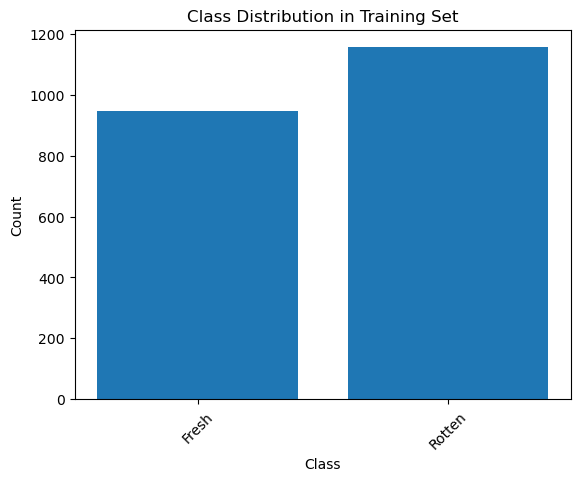

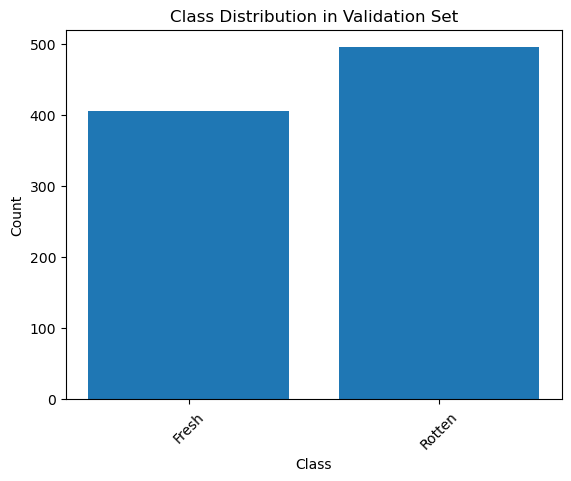

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Display sample images from the generator
def plot_sample_images(generator, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        batch = next(generator)
        image = batch[0][0]  # Take the first image from the batch
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title('Class: {}'.format(np.argmax(batch[1][0])))  # Get the class label
        plt.axis('off')
    plt.show()

# Plot class distribution
def plot_class_distribution(generator, dataset_name):
    num_classes = len(generator.class_indices)
    labels = generator.classes
    class_counts = np.bincount(labels)
    class_names = list(generator.class_indices.keys())

    plt.bar(range(num_classes), class_counts, tick_label=class_names)
    plt.title('Class Distribution in {} Set'.format(dataset_name))
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



# Plot class distribution in the training set
plot_class_distribution(training_generator, 'Training')

# Plot class distribution in the validation set
plot_class_distribution(validation_generator, 'Validation')


In [89]:
training_generator[0]

(array([[[[0.81568635, 0.7843138 , 0.7411765 ],
          [0.81568635, 0.7843138 , 0.7411765 ],
          [0.8117648 , 0.7803922 , 0.7372549 ],
          ...,
          [0.7490196 , 0.7137255 , 0.6784314 ],
          [0.7490196 , 0.7137255 , 0.6784314 ],
          [0.7490196 , 0.7137255 , 0.6784314 ]],
 
         [[0.7960785 , 0.76470596, 0.72156864],
          [0.8000001 , 0.7686275 , 0.7254902 ],
          [0.80392164, 0.7725491 , 0.7294118 ],
          ...,
          [0.73333335, 0.7019608 , 0.6509804 ],
          [0.7372549 , 0.7058824 , 0.654902  ],
          [0.7372549 , 0.7058824 , 0.654902  ]],
 
         [[0.81568635, 0.7843138 , 0.7411765 ],
          [0.8235295 , 0.79215693, 0.7490196 ],
          [0.8078432 , 0.77647066, 0.73333335],
          ...,
          [0.7568628 , 0.7254902 , 0.6745098 ],
          [0.7568628 , 0.7254902 , 0.6745098 ],
          [0.7490196 , 0.7176471 , 0.6666667 ]],
 
         ...,
 
         [[0.6117647 , 0.5764706 , 0.5568628 ],
          [0.61568

Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

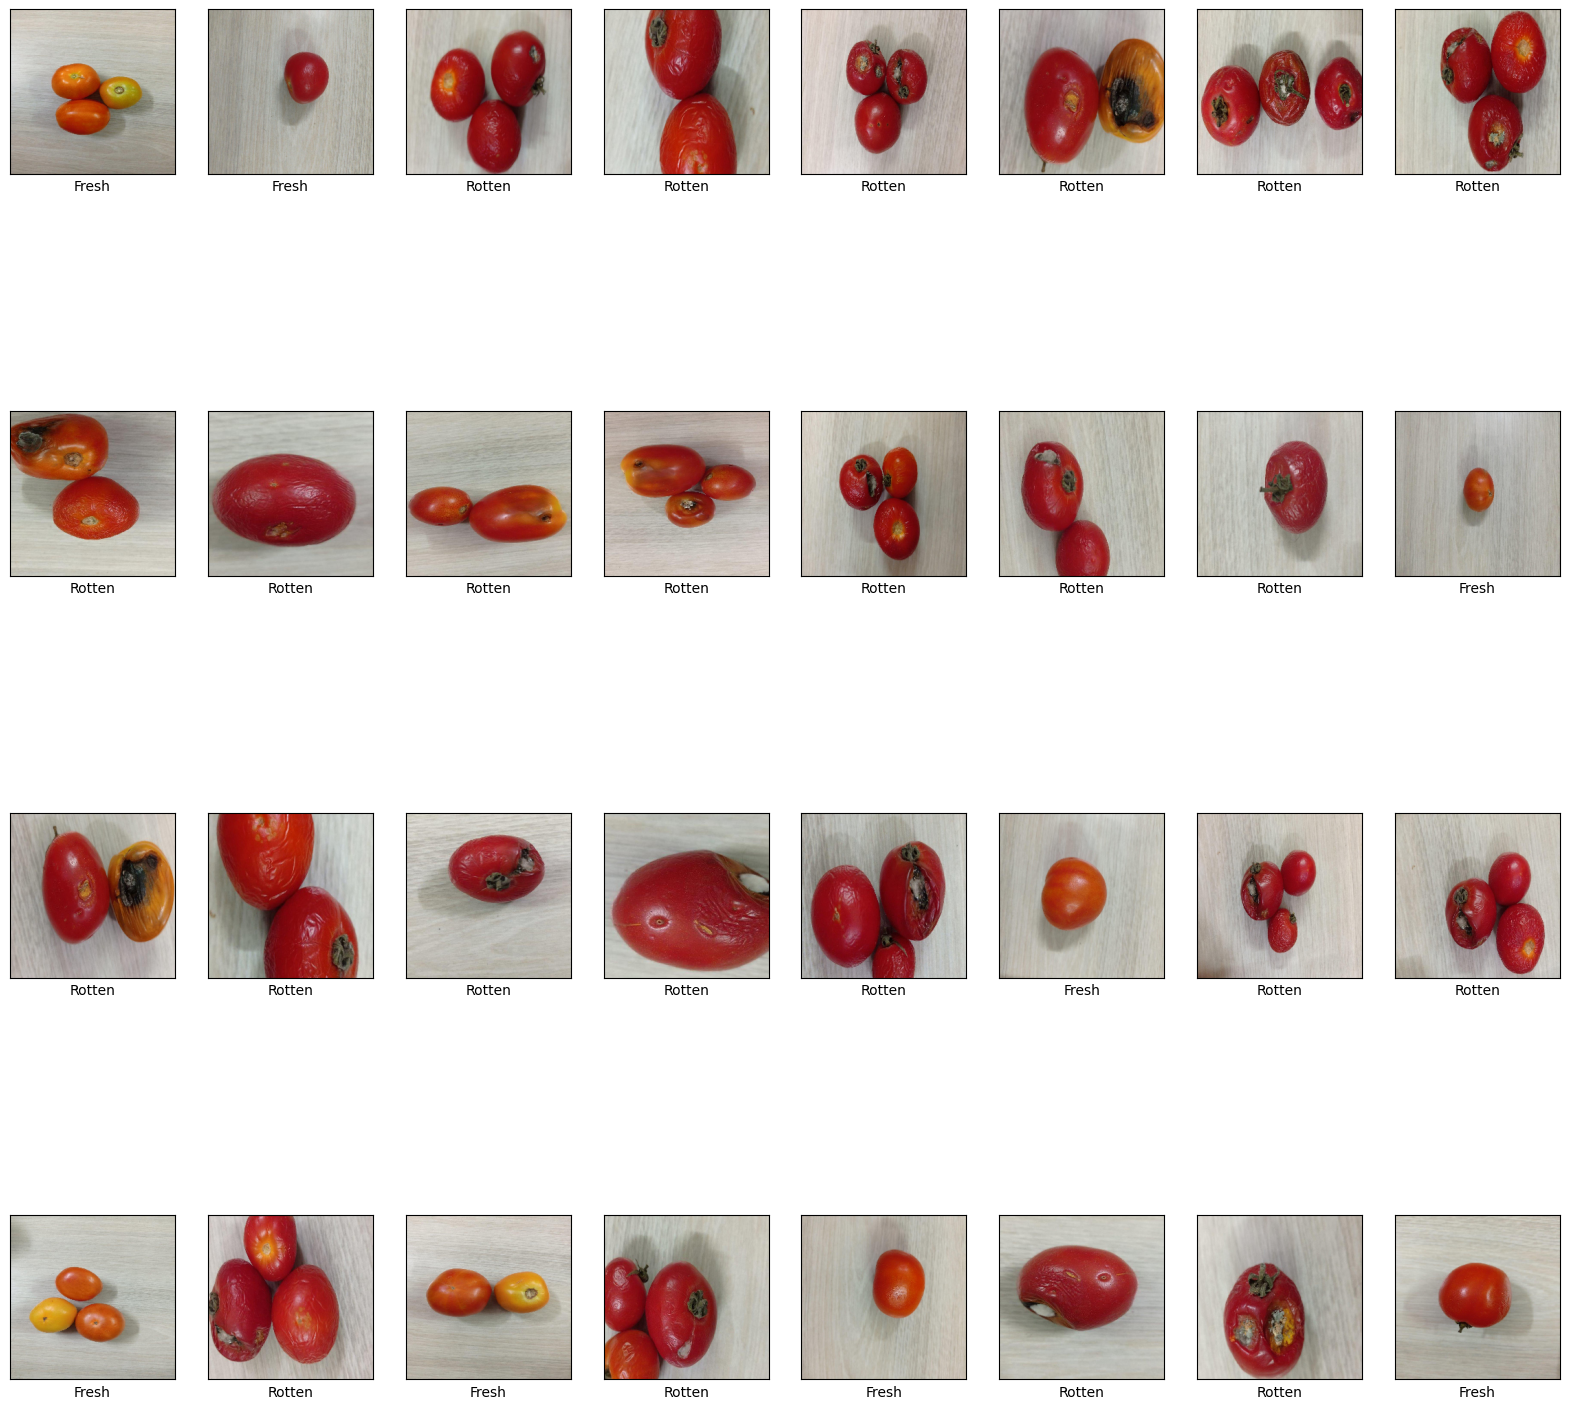

In [90]:
# to get all the classes of tomatoes found in the data
tomato_name_index = training_generator.class_indices

# to get all the classes of tomatoes found in the data
training_labels = list(training_generator.class_indices.keys())

# to get the first batch of images and associated labels
images, labels = training_generator[0]

# to get the size of the batch
batch_size = len(images)

# to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols

# display the images
plt.figure(figsize=(20,20))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

## NOTE: This section simply breaksdown some of the code above to show what is happening... this should be removed in production

In [91]:
# get all the classes of tomatoes found in the data
tomato_name_index = training_generator.class_indices
print(tomato_name_index)

{'Fresh': 0, 'Rotten': 1}


In [92]:
# get all the classes of tomatoes found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Fresh', 'Rotten']


In [93]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [94]:
print(images.shape) 

(32, 240, 240, 3)


In [95]:
print(labels) 

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [96]:
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[1. 0.]
0
Fresh


# Model

In [97]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(240,240,3)))  # Adjusted input shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer to reduce dimensions further
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with fewer neurons
model.add(Dense(128, activation='relu'))  # Adjusted to reduce complexity

# Add the final prediction layer with 2 neurons, one for each class
model.add(Dense(2, activation='softmax'))'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer

# Output layer
model.add(Dense(2, activation='softmax'))


/Users/vamsimanuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [98]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
#train the model
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

history = model.fit(training_generator, validation_data=(validation_generator), epochs=15, verbose=2,callbacks=[early_stop])

Epoch 1/15


/Users/vamsimanuri/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 - 40s - 601ms/step - accuracy: 0.7948 - loss: 0.4542 - val_accuracy: 0.8078 - val_loss: 0.5103
Epoch 2/15
66/66 - 38s - 570ms/step - accuracy: 0.9000 - loss: 0.2938 - val_accuracy: 0.8456 - val_loss: 0.3720
Epoch 3/15
66/66 - 39s - 594ms/step - accuracy: 0.9229 - loss: 0.1990 - val_accuracy: 0.7900 - val_loss: 0.4429
Epoch 4/15
66/66 - 39s - 587ms/step - accuracy: 0.9514 - loss: 0.1477 - val_accuracy: 0.5989 - val_loss: 0.7157
Epoch 5/15
66/66 - 38s - 580ms/step - accuracy: 0.9567 - loss: 0.1358 - val_accuracy: 0.8300 - val_loss: 0.4004
Epoch 6/15
66/66 - 39s - 586ms/step - accuracy: 0.9743 - loss: 0.0942 - val_accuracy: 0.9222 - val_loss: 0.2014
Epoch 7/15
66/66 - 42s - 632ms/step - accuracy: 0.9667 - loss: 0.0941 - val_accuracy: 0.9200 - val_loss: 0.2167
Epoch 8/15
66/66 - 47s - 706ms/step - accuracy: 0.9648 - loss: 0.1066 - val_accuracy: 0.9211 - val_loss: 0.1934
Epoch 9/15
66/66 - 48s - 732ms/step - accuracy: 0.9805 - loss: 0.0667 - val_accuracy: 0.8678 - val_loss: 0.2950
Epo

# Summarize the model and it's performance

In [100]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    27,558,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,734,024 (315.61 MB)

 Trainable params: 27,577,922 (105.20 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 55,155,846 (210.40 MB)

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confution Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = validation_generator.classes

#target_names = species of apples (class names)
target_names = list(training_generator.class_indices.keys())

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step


In [102]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

       Fresh     0.9526    0.8938    0.9223       405
      Rotten     0.9173    0.9636    0.9399       495

    accuracy                         0.9322       900
   macro avg     0.9350    0.9287    0.9311       900
weighted avg     0.9332    0.9322    0.9320       900



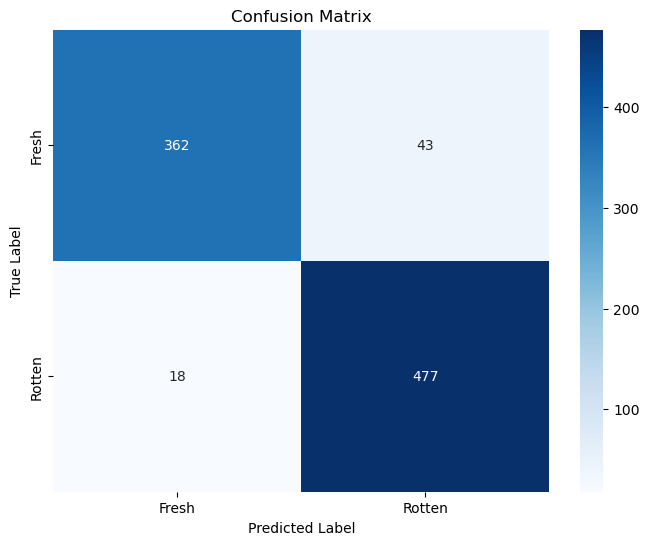

In [103]:
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Predict a single image


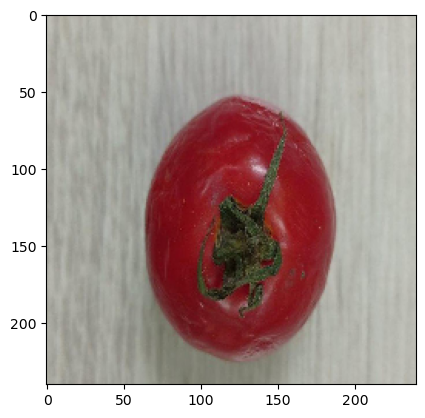

In [104]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img(
    "/Users/vamsimanuri/Downloads/tomatoes_new/Rotten/python_original_IMG_20230120_221800.jpg_081cf5ce-f30c-48aa-90bf-f18f859b6e49.jpg",
    color_mode='rgb',
    target_size=(240,240)
)

plt.imshow(img)

In [105]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[1.6594239e-04, 9.9983406e-01]], dtype=float32)

In [106]:
np.round(model.predict(img_rank4),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0., 1.]], dtype=float32)

In [107]:
label_map = (training_generator.class_indices)
label_map

{'Fresh': 0, 'Rotten': 1}

In [108]:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'Rotten'

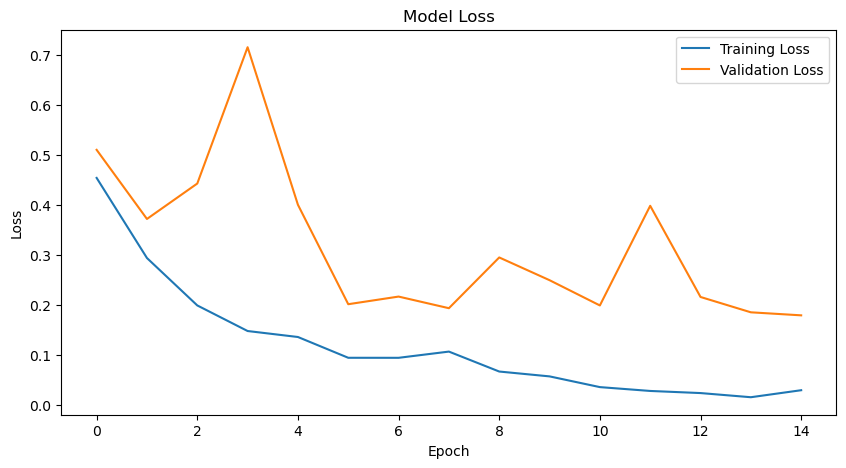

In [109]:
# training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

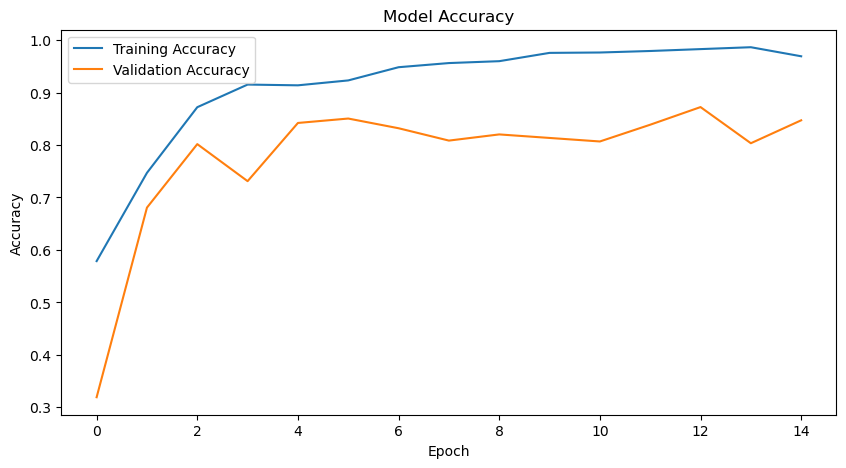

In [86]:
#training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()